# A model for the effects of hogg predation on mussels for salt marsh resilience - Figures only
### Marc Hensel, Brian Silliman and Johan van de Koppel, November 2019

Roughly based on Guichard et at, 2003. Mussel Disturbance Dynamics: Signatures of Oceanographic
Forcing from Local Interactions. Am. Nat. 2003. Vol. 161, pp. 889-904.

Here we model how Hogs density <i>H</i> affects the cover of mussels <i>M</i> in a saltmarsh, indirectly affecting the ability of the marsh to recover from drought-induced dieoff. We presume that mussel density in the marsh follows a logistic growth rate, where <i>r</i> is the intrisic growth rate, and <i>K</i> is the carrying capacity. The predation by hogs is modelled as a linear function of both hogg and mussel density: $d(M) M H$, where <i>d(M)</i> decribes the rate of predation per mussel and per hog, which is a function of mussel density as the hoggs focus on remaining mussels once mussel density decreases, increasing predation rates. The model can now be described as:

$$
\begin{aligned}
\frac{dM}{dt}&= r (1-\frac{M}{K}) M - d(M) M H
\end{aligned}
$$

Here we analyse how the density of mussel decreases with increasing hogg population sizes, analysing three models.  The first model does not presume any focussing of hoggs, and <i>d(M)</i> equals to a constant <i>d</i>. The second model presumes complete focussing of the hoggs on the remaining mussels, which implies that <i>d(M)</i> = <i>d/M</i>. In this case the total predation pressure on the mussel population reduces to <i>dH</i>. The third model presume partial focussing, meaning the predation pressure on individual mussels increase with decreasing mussel density, but less then proportional because the hoggs partially switch to different foods. Here, <i>d(M)</i> is given by <i>d/(M+a)</i>, where <i>a</i> is constant lowering the impact of focussing on the mussels.

### First setup of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time,os
from fbm import fbm
from matplotlib.colors import LinearSegmentedColormap

# Putting the screen to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

on=1;off=0;           # Declaration of the terms on and off

### Loading the data 

In [2]:
Fnames = ['HogSimulations-large1.npz','HogSimulations-large2.npz','HogSimulations-large3.npz','HogSimulations-large4.npz','HogSimulations-large5.npz'] 

for i in range(len(Fnames)):
    Data=np.load(Fnames[i])
    if i==0:
        Cover=Data['Cover']
        RecReps=Data['RecReps']
    else:
        RecReps=np.append(RecReps,Data['RecReps'])
        
RepNr = RecReps.shape[0] / Cover.shape[0] / len(Fnames)  # Number of replicates per cover in each simulation results file
CoverX=np.tile(np.repeat(Cover,RepNr),len(Fnames))       # The cover all tiled-up

### Making a data frame 

In [3]:
import pandas as pd
data = {'Cover':CoverX, 'Return':RecReps} 
df = pd.DataFrame(data) 

FigData=df.groupby('Cover')['Return'].mean()

### Plotting the data

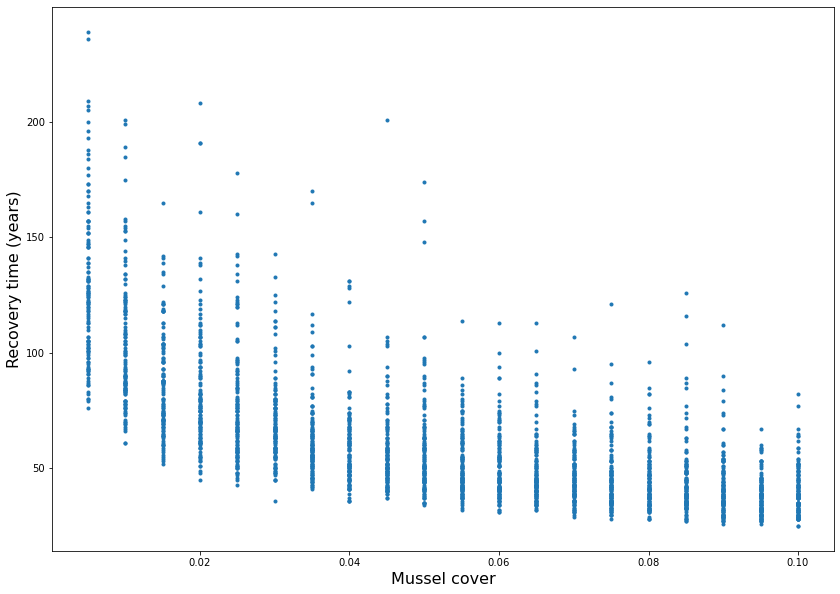

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_xlabel('Mussel cover', fontsize=16)
ax.set_ylabel('Recovery time (years)', fontsize=16)
ax.plot(CoverX,RecReps,".", label='Recovery');

### A plot of the averages 

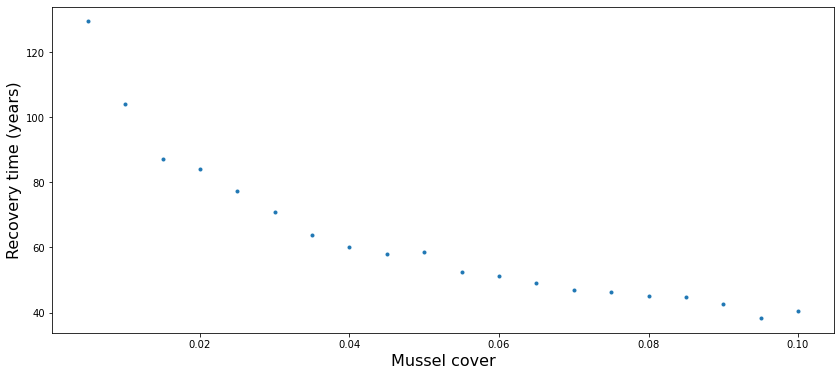

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.set_xlabel('Mussel cover', fontsize=16)
ax.set_ylabel('Recovery time (years)', fontsize=16)
#ax.set_title("Hogs don't focus more on remaining mussels when mussel density diminishes")
ax.plot(FigData,".", label='Recovery');
#ax.set_ylim([0,0.2])

### Linear fit

In [6]:
Fit=np.polyfit(x=df['Cover'],y=df['Return'],  deg=2)
Xc=np.linspace(0.005,0.1,100)
Yc=Fit[2]+Fit[1]*Xc+Fit[0]*Xc**2

### Logaritmic fit

In [7]:
FitL=np.polyfit(x=df['Cover'],y=np.log(df['Return']),  deg=1)
Xl=np.linspace(0.005,0.1,100)
Yl=np.exp(FitL[1]+FitL[0]*Xc)

### Power fit

In [8]:
FitP=np.polyfit(x=np.log(df['Cover']),y=np.log(df['Return']),  deg=1)
Xp=np.linspace(0.005,0.1,100)
Yp=np.exp(FitP[1]+FitP[0]*np.log(Xc))

import scipy.stats as ss
FitPs=ss.linregress(x=np.log(df['Cover']),y=np.log(df['Return']))
FitPs


LinregressResult(slope=-0.40468949720154473, intercept=2.7544730327318288, rvalue=-0.7702595440574274, pvalue=0.0, stderr=0.006703873947914604)

### Making a plot with the fit

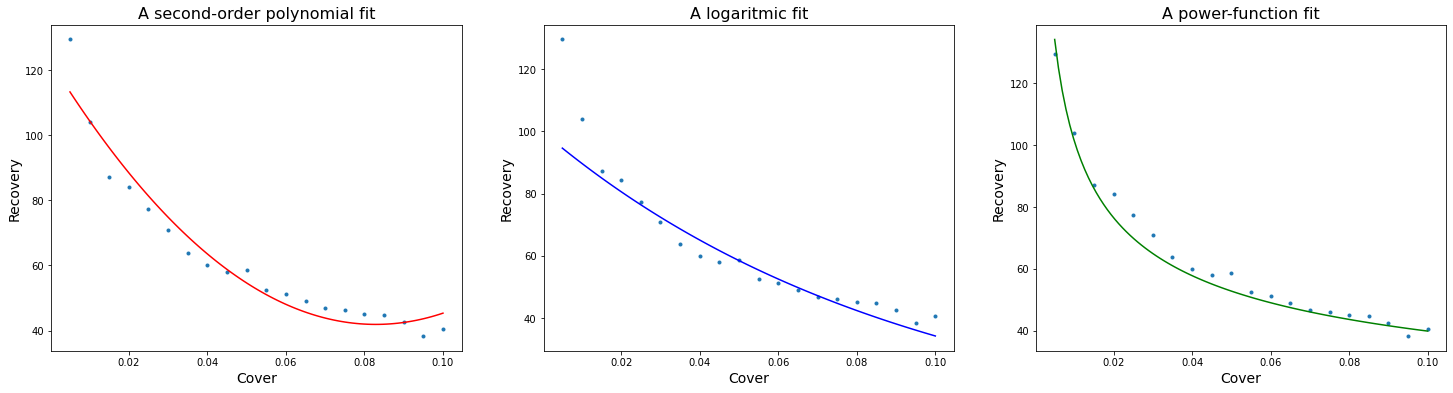

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6))

#ax.set_title("Hogs don't focus more on remaining mussels when mussel density diminishes")
ax[0].plot(FigData,".", label='Recovery');
ax[0].plot(Xc,Yc,'r-');
ax[0].set_xlabel('Cover', fontsize=14)
ax[0].set_ylabel('Recovery', fontsize=14)
ax[0].set_title('A second-order polynomial fit', fontsize=16)

ax[1].plot(FigData,".", label='Recovery');
ax[1].plot(Xl,Yl,'b-');
ax[1].set_xlabel('Cover', fontsize=14)
ax[1].set_ylabel('Recovery', fontsize=14)
ax[1].set_title('A logaritmic fit', fontsize=16)

ax[2].plot(FigData,".", label='Recovery');
ax[2].plot(Xp,Yp,'g-');
ax[2].set_xlabel('Cover', fontsize=14)
ax[2].set_ylabel('Recovery', fontsize=14);
ax[2].set_title('A power-function fit', fontsize=16);

## Effects of Pigs on Mussel patches
Here, we presume that the predation pressure on the mussels increases as the density of mussels down up. We investige 2 models and compare them with the one with a constant predation pressure.

### The  parameters

In [10]:
Pt=1
r=1
d=0.1
K=100
i=100
a=10        # 10
M=np.linspace(1/i,K,i)
Ki=np.linspace(K,K,i)

### Three functions defining how predation on mussels changes with changing mussel density.

In [11]:
f1 = Pt/Ki     # A constant predation pressure, no effect of lowered mussel density
f2 = Pt/M      # An increasing predation pressure, going up proportionally as the mussel density decreases
f3 = Pt/(a+M)  # An increasing predation pressure, going up less than proportionally as the mussel density decreases

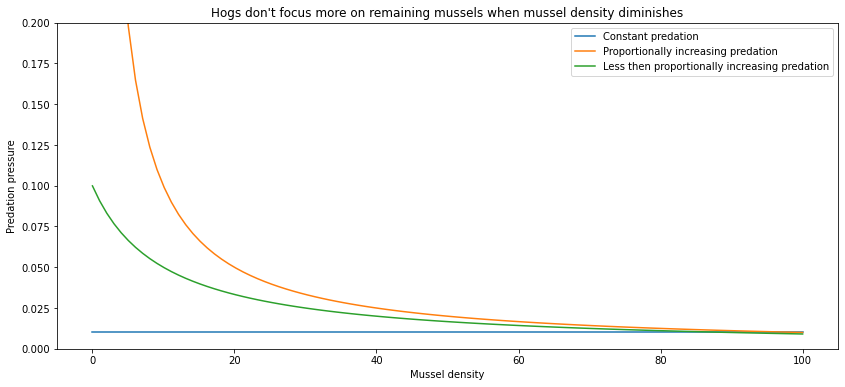

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.set_xlabel('Mussel density')
ax.set_ylabel('Predation pressure')
ax.set_title("Hogs don't focus more on remaining mussels when mussel density diminishes")
ax.plot(M,f1, label='Constant predation');
ax.plot(M,f2, label='Proportionally increasing predation');
ax.plot(M,f3, label='Less then proportionally increasing predation');
ax.set_ylim([0,0.2])
ax.legend();

## Three models of hog predation

### Parameters

In [13]:
r=1    # Growth rate of the mussels
K=100  # Carrying capacity of the mussels
d=20   # Predation parameter linking hog presence to mussel mortality
a=20   # Hog switching parameter, only used in model III

### Model I: No hog focussing
The assumption here is that hogs do not focus on mussels. They only eat them when the accidentaly encounter them.

In [14]:
def f1(M): return 1/K*np.ones(M.shape)
Pt1=r*(1-M/K)/(d*f1(M))

### Model II: Complete focussing
Hogs search for mussels and nothing else. This means that predation pressure increases as mussel density goes down. 

In [15]:
def f2(M): return 1/M
Pt2=r*(1-M/K)/(d*f2(M))

### Model III: Incomplete hog focussing
Hog focussing is there, but is not complete. When mussel density goes down, hogs switch to other food source in part.

In [16]:
def f3(M): return 1/(M+a)
Pt3=r*(1-M/K)/(d*f3(M))

### From mussel cover to resilience

In [17]:
def Res(M): return np.exp(FitP[1]+FitP[0]*np.log(M))

In [18]:
# [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

Green=u'#2ca02c'
Orange=u'#ff7f0e'
Blue=u'#1f77b4'

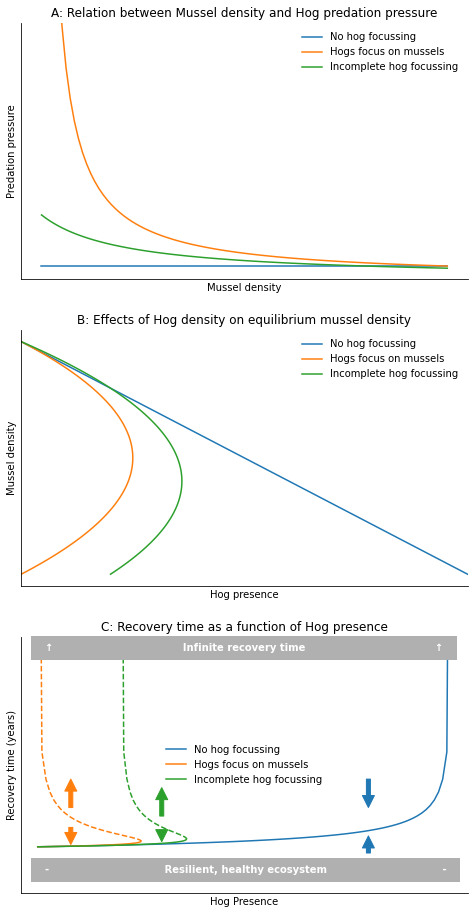

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(8, 16))

ax[0].set_xlabel('Mussel density')
ax[0].set_ylabel('Predation pressure')
ax[0].set_title("A: Relation between Mussel density and Hog predation pressure")
ax[0].plot(M,f1(M), label='No hog focussing');
ax[0].plot(M,f2(M), label='Hogs focus on mussels');
ax[0].plot(M,f3(M), label='Incomplete hog focussing');
ax[0].axes.get_xaxis().set_ticks([])
ax[0].axes.get_yaxis().set_ticks([])
ax[0].set_ylim([0,0.2])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend(frameon=False)

p21=ax[1].plot(Pt1,M, label="No hog focussing");
p22=ax[1].plot(Pt2,M, label="Hogs focus on mussels");
p23=ax[1].plot(Pt3,M, label="Incomplete hog focussing");
ax[1].set_xlim([0,5])
ax[1].set_xlabel('Hog presence')
ax[1].set_ylabel('Mussel density')
ax[1].set_title("B: Effects of Hog density on equilibrium mussel density")
ax[1].axes.get_xaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(frameon=False)

Conv=0.1

#
p31=ax[2].plot(Pt1,Res(M*Conv), '-',  label="No hog focussing", color=Blue);
#p32=ax[2].plot(Pt2,Res(M*Conv), '--', label="Hogs focus on mussels");
p32a=ax[2].plot(Pt2[0:np.argmax(Pt2)],Res(M*Conv)[0:np.argmax(Pt2)], '--',color=Orange)
p32b=ax[2].plot(Pt2[np.argmax(Pt2):],Res(M*Conv)[np.argmax(Pt2):],'-' , color=Orange, label="Hogs focus on mussels");
#p33=ax[2].plot(Pt3,Res(M*Conv), '--', label="Incomplete hog focussing");
p33a=ax[2].plot(Pt3[0:np.argmax(Pt3)],Res(M*Conv)[0:np.argmax(Pt3)], '--',color=Green)
p33b=ax[2].plot(Pt3[np.argmax(Pt3):],Res(M*Conv)[np.argmax(Pt3):],'-' , color=Green, label="Incomplete hog focussing");
ax[2].set_title("C: Recovery time as a function of Hog presence")
ax[2].set_xlim([-0.2,5.2]);
ax[2].set_ylim([-10,80]);
ax[2].set_xlabel('Hog Presence')
ax[2].set_ylabel('Recovery time (years)')
ax[2].axes.get_xaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].legend(frameon=False, loc='center');

opt = dict(color=Blue,width=4)
a1_1  = ax[2].annotate('',xy=(4,20),xycoords='data',xytext =(4,30),textcoords = 'data',arrowprops=opt)
a1_2  = ax[2].annotate('',xy=(4,10),xycoords='data',xytext =(4,4),textcoords = 'data',arrowprops=opt)

opt = dict(color=Green,width=4)
a2_1  = ax[2].annotate('',xy=(1.5,27),xycoords='data',xytext =(1.5,17),textcoords = 'data',arrowprops=opt)
a2_2  = ax[2].annotate('',xy=(1.5, 8),xycoords='data',xytext =(1.5,12),textcoords = 'data',arrowprops=opt)

opt = dict(color=Orange,width=4)
a3_1  = ax[2].annotate('',xy=(0.4,30),xycoords='data',xytext =(0.4,20),textcoords = 'data',arrowprops=opt)
a3_2  = ax[2].annotate('',xy=(0.4, 7),xycoords='data',xytext =(0.4,13),textcoords = 'data',arrowprops=opt)

GrayColor=u'#b0b0b0'
Space='                                 ' ###
ax[2].text(0, 75, '  ↑'+Space+'    Infinite recovery time    '+Space+'↑  ', fontweight='bold', color='white',
        bbox={'facecolor': GrayColor, 'edgecolor': 'none', 'pad': 7});

ax[2].text(0, -3, '  -'+Space+'Resilient, healthy ecosystem'+Space+'-  ', fontweight='bold', color='white',
        bbox={'facecolor': GrayColor, 'edgecolor': 'none', 'pad': 7});

plt.savefig('HenselFig.pdf') 

In [22]:
os.system("say finished");

The End, Johan van de Koppel 2019